## Model Setup

Here, we describe the model set up including the grid and the initial conditions.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

### Model Grid

This single iceberg model is constructed on a relatively small and simple domain. The model has the following dimensions:

In [3]:
n_rows = 62
n_cols = 62
n_depth_levels = 1

In [4]:
delX = 20e3
x = np.arange(n_cols)*delX-delX
y = x
X, Y = np.meshgrid(x,y)

The bathymetry of the model is uniformly 500 m deep except at the enclosed edges of the model domain. Let's read it in and habe a look:

In [3]:
bathymetry = np.fromfile('../../../../example_configs/cold_barotropic_gyre/input/bathy.bin','>f4').reshape((n_rows,n_cols))

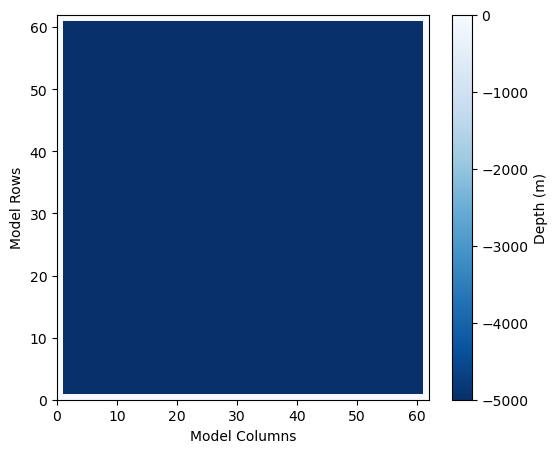

In [4]:
fig = plt.figure(figsize=(6,5))
C = plt.pcolormesh(bathymetry,cmap='Blues_r')
plt.colorbar(C, label='Depth (m)')
plt.xlabel('Model Columns')
plt.ylabel('Model Rows')
plt.show()

### Initial Conditions

The model has been run for 3 years already and a pickup is provided.

In [19]:
pickup = np.fromfile('../../../../example_configs/cold_barotropic_gyre/input/pickup.0000000001.data','>f8').reshape((9, n_rows,n_cols))

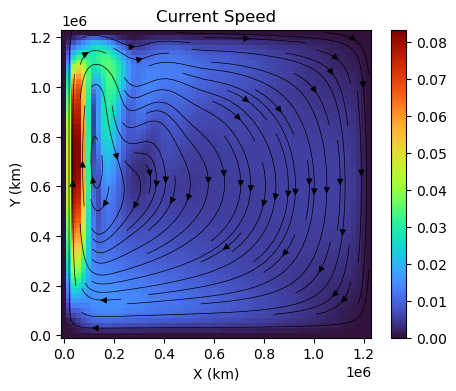

In [24]:
# get the velocity fields
u_vel = pickup[0,:,:]
v_vel = pickup[1,:,:]

# compute the speed as a grid
speed_grid = (u_vel**2 + v_vel**2)**0.5

# plot the wind
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(X, Y, speed_grid, cmap='turbo')

# plot the stream function of the grid
plt.streamplot(X, Y, u_vel, v_vel, linewidth=0.5, color='k')

# format the figure
plt.colorbar(C)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Current Speed')
plt.show()

### External Forcing Conditions

Just like the initial conditions, the external forcing conditions are designed to approximate conditions Arctic conditions. The conditions are provided on 6-hourly timesteps for 366 days:

In [5]:
days = np.arange(366*4)/4

In [14]:
Atemp = np.fromfile('../../../../example_configs/cold_barotropic_gyre/input/exf/Atemp_2016','>f4').reshape((366*4, n_rows,n_cols))
Swdown = np.fromfile('../../../../example_configs/cold_barotropic_gyre/input/exf/Swdown_2016','>f4').reshape((366*4, n_rows,n_cols))
Lwdown = np.fromfile('../../../../example_configs/cold_barotropic_gyre/input/exf/Lwdown_2016','>f4').reshape((366*4, n_rows,n_cols))
Ustress = np.fromfile('../../../../example_configs/cold_barotropic_gyre/input/exf/Ustress_2016','>f4').reshape((366*4, n_rows,n_cols))

Let's peek at the timeseries:

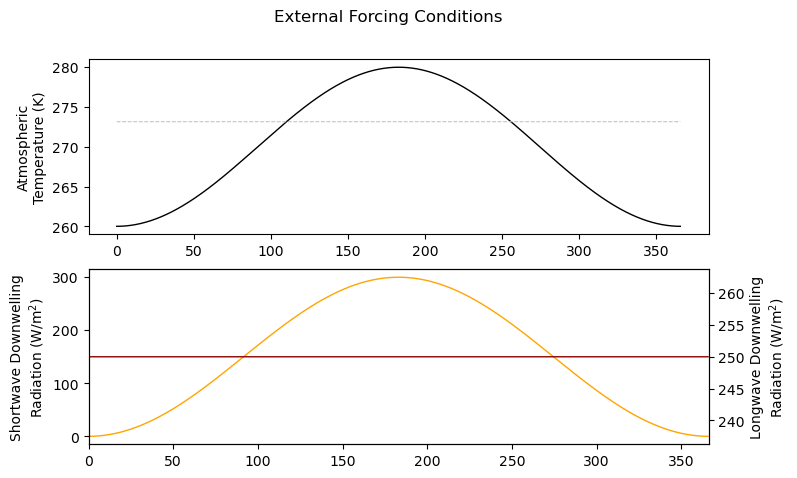

In [25]:
fig = plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
plt.plot(days, Atemp[:,5,5], 'k-', linewidth=1)
plt.plot(days, 273.15*np.ones_like(days), '--', color='silver', linewidth=0.75)
plt.ylabel('Atmospheric\nTemperature (K)')

plt.subplot(2,1,2)
plt.plot(days, Swdown[:,5,5], '-',color='orange', linewidth=1)
plt.ylabel('Shortwave Downwelling\nRadiation (W/m$^2$)')
ax2 = plt.gca().twinx()
ax2.plot(days, Lwdown[:,5,5], '-', color='darkred', linewidth=1)
ax2.set_ylabel('Longwave Downwelling\nRadiation (W/m$^2$)')
plt.xlim([0,366])

plt.suptitle('External Forcing Conditions')

plt.show()

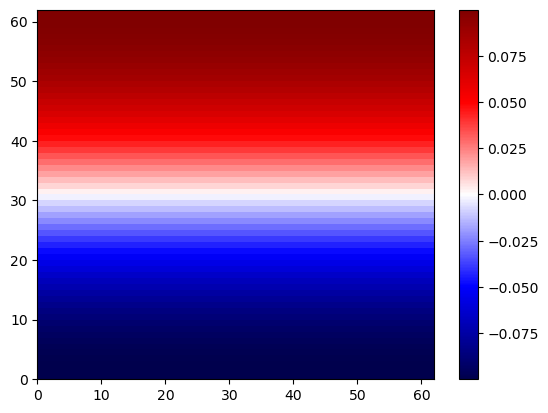

In [27]:
C = plt.pcolormesh(Ustress[0,:,:], cmap='seismic')
plt.colorbar(C)
plt.show()

With these conditions in hand, we are ready to compile and run our model code.

## Blanklist Configuration

In [5]:
n_cols = 93
x = np.arange(n_cols)*delX-32*delX
X, Y = np.meshgrid(x,y)

In [9]:
bathymetry_blank = np.fromfile('../../../../example_configs/cold_barotropic_gyre/input_blanklist/bathy.bin','>f4').reshape((n_rows,n_cols))

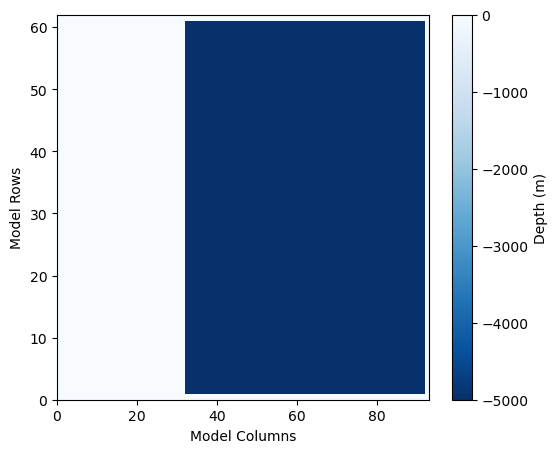

In [10]:
fig = plt.figure(figsize=(6,5))
C = plt.pcolormesh(bathymetry_blank,cmap='Blues_r')
plt.colorbar(C, label='Depth (m)')
plt.xlabel('Model Columns')
plt.ylabel('Model Rows')
plt.show()

Mirroring the bathymetry, the initial conditions and external forcing conditions also have the "land" section":

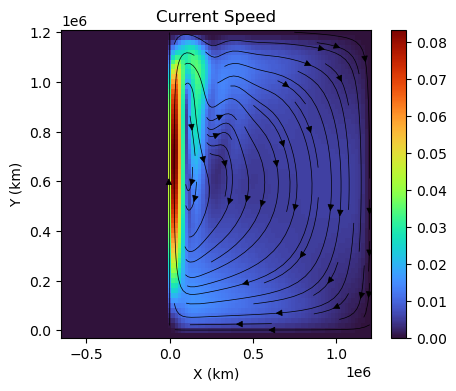

In [13]:
pickup_blank = np.fromfile('../../../../example_configs/cold_barotropic_gyre/input_blanklist/pickup.0000000001.data','>f8').reshape((9, n_rows,n_cols))

# get the velocity fields
u_vel_blank = pickup_blank[0,:,:]
v_vel_blank = pickup_blank[1,:,:]

# compute the speed as a grid
speed_grid_blank = (u_vel_blank**2 + v_vel_blank**2)**0.5

# plot the wind
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(X, Y, speed_grid_blank, cmap='turbo')

# plot the stream function of the grid
plt.streamplot(X, Y, u_vel_blank, v_vel_blank, linewidth=0.5, color='k')

# format the figure
plt.colorbar(C)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Current Speed')
plt.show()